# import

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [11]:
np.random.seed(202150256)
x = np.random.normal(loc = 2, scale = 1.5, size =1000)
y = stats.t.rvs(df=10,size =1000)/np.sqrt(10/8)*1.5 + 2

In [12]:
np.std(y),np.mean(y)

(1.4739981187361109, 1.9504733080884165)

`-` 우리가 관측한 $x_1\dots x_{1000}$ 이 $N(2,1.5^2)$ 에서 나온 샘플인지 궁금하다.

`-` 아이디어

(1) 관측한 값을 순서대로 나열하여 $x_{(1)}\dots x_{(1000)}$을 만든다.

(2) 파이썬이나 R로 $N (2, 1.5^2)$ 에서 1000개의 정규분포를 생성. 그리고 순서대로 나열하여 $\tilde x_{(1)}\dots \tilde x_{(1000)}$ 을 만는다.

(3) $x_{(1)} \approx \tilde x_{(1)} \dots x_{(1000)} \approx \tilde x_{(1000)}$ 이면 우리가 관측한 $x$는 정규분포일 것이다.

* 값을 정렬

In [13]:
x.sort()

* 편리한 계산을 위해 표준화 과정을 거침

In [14]:
xx = (x-np.mean(x))/np.std(x,ddof=1)

* 가장 작은 관측값 2개를 추출

In [15]:
xx[:2]

array([-3.60370086, -2.76081303])

* 아래의 값을 확인해 보니 얼추 비슷하게 나오는 것 같다.

In [9]:
stats.norm.ppf(0.001), stats.norm.ppf(0.002)

(-3.090232306167813, -2.878161739095483)

* 이제 이론적인 값을 생성

In [27]:
m = [i / 1000 for i in range(1000)]

In [28]:
q = [stats.norm.ppf(m[i]) for i in range(len(m))]

* $xx \approx q$ 임을 확인하기 위해서 $(q,q)$ 그래프와 $(q, xx)$ 그래프를 그려서 겹쳐보자.

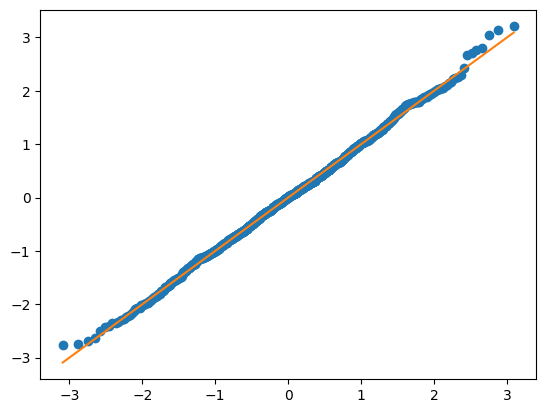

In [29]:
plt.plot(q,xx,"o")
plt.plot(q,q,"-")

`-` 해석 : 점들이 주황색선 근처에 모여있을 수록 정규분포에 가깝다고 볼 수 있다.

`-` 아래와 같은 방법으로도 그릴 수 있음.

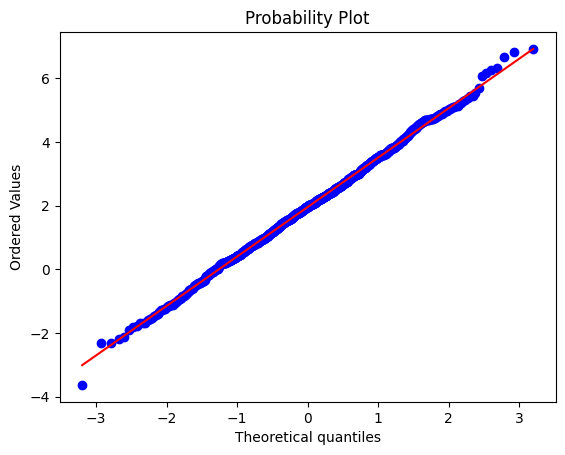

In [32]:
_ = stats.probplot(x,plot=plt)

`-` 우리가 그린 그림과 비교

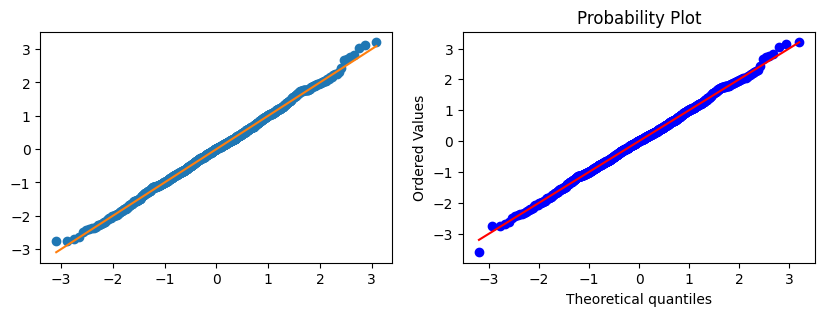

In [34]:
fig,axes = plt.subplots(1,2,figsize=(10,3))
ax1, ax2 = axes

ax1.plot(q,xx,"o")
ax1.plot(q,q,"-")
_ = stats.probplot(xx,plot=ax2)

`-` 그림이 살짝 다른 이유는 우리가 한 것 처럼 $m = (\frac {1}{1000}\dots \frac {1000}{1000})$ 이 아닌 약간 보정한 값을 계산하기 때문임.

`-` 이제 우리가 처음에 생성한 정규분포와 t분포의 qqplot을 그려 비교해보자.

Text(0.5, 1.0, 't dist')

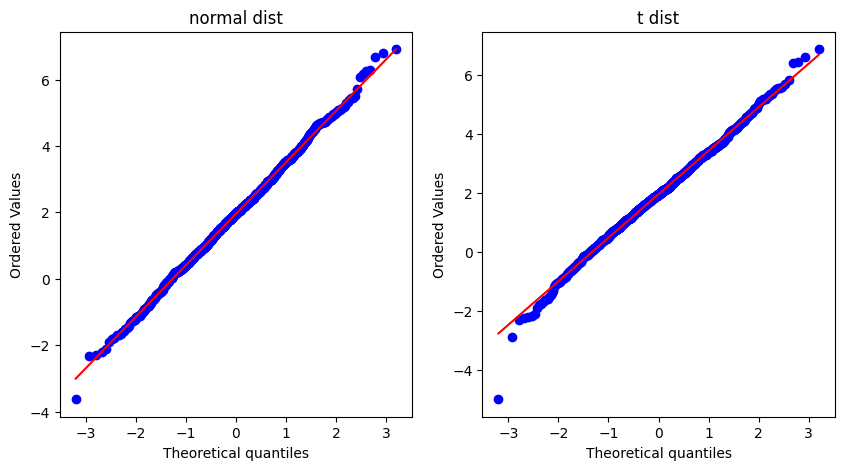

In [35]:
fig, axes =plt.subplots(1,2, figsize = (10,5))
ax1,ax2=axes
_ = stats.probplot(x,plot=ax1)
_ = stats.probplot(y,plot=ax2)
ax1.set_title("normal dist")
ax2.set_title("t dist")

* t분포 : 푸른점들이 대체로 붉은선 놓여 있는듯 하지만 양끝단에서는 그렇지 않다.(중앙부근은 정규분포와 비슷하지만, 꼬리부분은 정규분포와 확실히 다르다.)

  * 완쪽 꼬리 : 이론적으로 나와야 할 값보다 더 작은 값이 실제로 관측됨

  * 오른쪽 꼬리 : 이론적으로 나와야할 값보다 더 큰 값이 실제로 관측됨

  * 따라서 $y$의 분포는 정규분포보다 더 두꺼운 꼬리를 가진다고 해석할 수 있다. 

## 예제 : boxplot. hist, qqplot 

In [36]:
import seaborn as sns

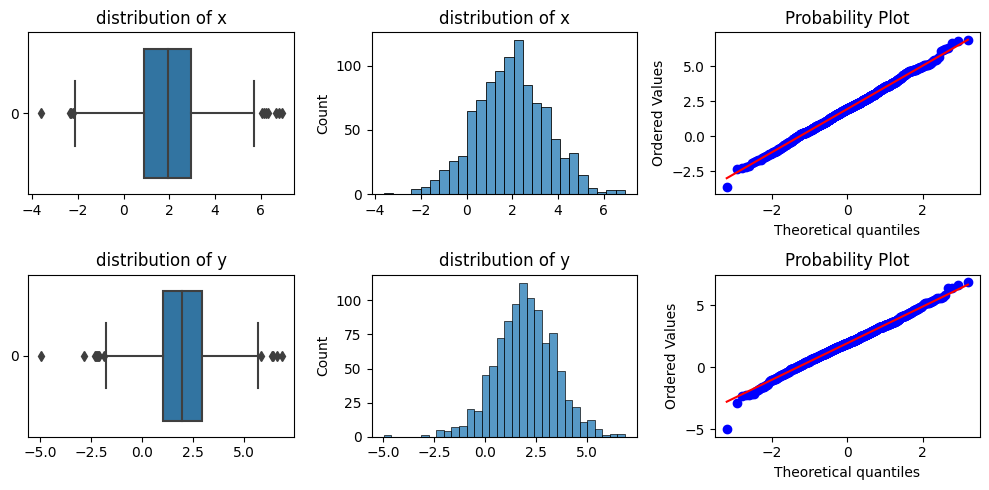

In [41]:
fig, axes = plt.subplots(2,3,figsize=(10,5))

(ax1, ax2, ax3), (ax4, ax5, ax6) = axes

sns.boxplot(x,ax=ax1,orient="h")
sns.histplot(x,ax=ax2)
_ = stats.probplot(x,plot=ax3)
ax1.set_title("distribution of x")
ax2.set_title("distribution of x")

sns.boxplot(y,ax=ax4,orient="h")
sns.histplot(y,ax=ax5)
_ = stats.probplot(y,plot=ax6)
ax4.set_title("distribution of y")
ax5.set_title("distribution of y")

fig.tight_layout()

# Appendix : 분위수를 구하는 다양한 방법

In [42]:
m  = [ i / 1000 for i in range(1000)]

## 방법 1

In [47]:
q = []

for i in range(len(m)) :
    q = q + [stats.norm.ppf(m[i])]

In [49]:
q[:5]

[-inf,
 -3.090232306167813,
 -2.878161739095483,
 -2.7477813854449926,
 -2.6520698079021954]

## 방법 2

In [50]:
q = [stats.norm.ppf(m[i]) for i in range(len(m))]

In [51]:
q[:5]

[-inf,
 -3.090232306167813,
 -2.878161739095483,
 -2.7477813854449926,
 -2.6520698079021954]

## 방법 3

In [52]:
q = list(map(stats.norm.ppf,m))
q[:5]

[-inf,
 -3.090232306167813,
 -2.878161739095483,
 -2.7477813854449926,
 -2.6520698079021954]

## 방법 4

In [53]:
list(stats.norm.ppf(m))[:5]

[-inf,
 -3.090232306167813,
 -2.878161739095483,
 -2.7477813854449926,
 -2.6520698079021954]

# Appendix : lambda, map  

##  예제 1

In [54]:
f = lambda x,y,z : x + y + z

In [55]:
f(2,3,4)

9

## 예제 2

In [56]:
x = lambda a="fee", b="file", c="foe" : a + b + c

In [58]:
x

<function __main__.<lambda>(a='fee', b='file', c='foe')>

In [60]:
x("wee")

'weefilefoe'

## 예제 3

In [61]:
l = [lambda x : x**2, lambda x: x**3, lambda x : x**4]

In [62]:
for f in l :
    print(f(2))

4
8
16


## 예제 4

In [63]:
dct = {"f1": lambda x : x+1, "f2" : lambda x : x+22, "f3": lambda x : x + 33}

In [65]:
dct["f1"](1), dct["f2"](1), dct["f3"](1)

(2, 23, 34)

## 예제 5

In [66]:
lower = lambda x,y : x if x<y else y

In [68]:
lower("a","b")

'a'

## 예제 6 

In [69]:
def action(x) :
    return (lambda y : x + y)

In [71]:
act = action (99)
act2 = action(98)

In [75]:
act(2), act2(2)

(101, 100)

## 예제 7

In [76]:
action = lambda x : (lambda y : x+y)

In [77]:
act = action (99)
act2 = action(98)

act(2), act2(2)

(101, 100)

## map


### 예제 1

In [78]:
def inc(x) : return x+1

In [80]:
list(map(inc, [1,2,3,4]))

[2, 3, 4, 5]

`-` 예제 1의 변형 (with lambda)

In [82]:
list(map(lambda x: x+1,[2,3,4,5]))

[3, 4, 5, 6]

### 에제 2

`-` map과 list comprehension

* 함수선언 : x라는 문자열에 "X"가 포함되어있는지 확인하는 함수

In [83]:
f = lambda x : "X" in x

(map)

In [84]:
list(map(f,["X1","X2","X3"]))

[True, True, True]

(list comprehension)

In [86]:
[f(x) for x in ["X1","X2","X3"]]

[True, True, True]

### 예제 3

`-`두 개의 입력을 받는함수의 경우 map과 list comprehension 비교

In [87]:
pow(2,5)

32

(map)

In [90]:
list(map(pow,[2,3],[0,1]))

[1, 3]

(list comprehension)

In [91]:
[pow(x,y) for x,y in zip([2,3],[0,1])]

[1, 3]

### 예제 4

map은 하나의 함수에 다향한 입력인 경우 사용가능하다.

In [93]:
l = lambda x: x+1,lambda x : x+2, lambda x: x+3

In [94]:
list(map(l,[100,200,300]))

TypeError: ignored

list comporehension은 다양한 함수, 다양한 입력이 가능함

In [96]:
[l[i](x) for i,x in zip([0,1,2],[100,200,300])]

[101, 202, 303]

## Summary

`-` 종합 : 리스트컴프리헨션과 비교하면 map은 반복인덱스를 쓰지 않는 장점이 있는 반면 다양한 함수를 한꺼번에 적용하지 못하는 제약이 있음

# 찰스미나드 예제

In [97]:
x=[44,48,49,58,62,68,69,70,76,79] ## 몸무게 
y=[159,160,162,165,167,162,165,175,165,172] ## 키
g= 'f','f','f','f','m','f','m','m','m','m'
df=pd.DataFrame({'w':x,'h':y,'g':g})
df

,w,h,g
0,44,159,f
1,48,160,f
2,49,162,f
3,58,165,f
4,62,167,m
5,68,162,f
6,69,165,m
7,70,175,m
8,76,165,m
9,79,172,m


`-` 미나드의 접근방법 : 고차원의 자료를 한 도면안에서 패널을 늘리는 방법을 선택

   * 일반적은 사람들은 보통 색깔을 사용할 생각을 못한다. (아래처럼 그린다.)

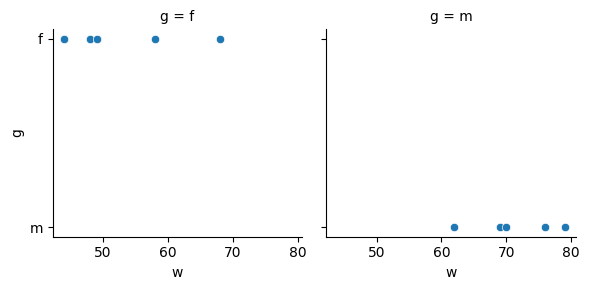

In [99]:
fig = sns.FacetGrid(df,col="g")
fig.map(sns.scatterplot,"w","g")

`-` 미나드의 접근

<Axes: >

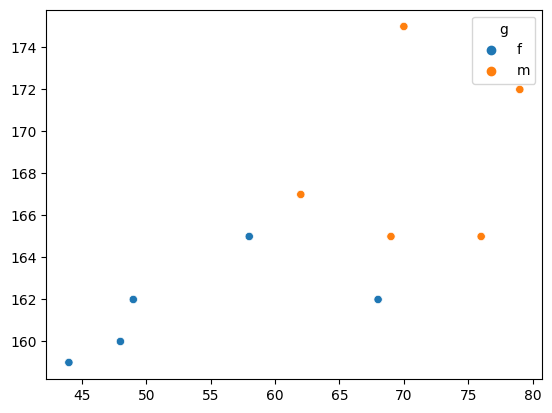

In [100]:
sns.scatterplot(data=df,x=x,y=y,hue="g")